# An Ensemble Technique for Predicting Stock Returns Based on Global Stock Exchanges Using Logistic Regression (LR) and Artificial Deep Neural Networks (ADNNs)

There are several factors that explain why the stock markets throughout the world are connected in some way. Some of the factors are listed below:
1)	The world's economies are interdependent. For instance, the two largest economies in the world are the United States and China. China is the United States' main trading partner, while China has several trading partners all over the world. China is the major supplier of goods to nations in Europe and Africa. Because of this global network, economies are interdependent. Hence, there will be a connection between the stock markets.
2)	Currency connects global marketplaces. The leading currency in the world is the US dollar. Because of its hegemony, it has a significant impact on international markets. The dollar's fluctuation has a significant impact on other markets.
3)	Several of the businesses are listed on more than one stock exchange. The same company listed on another stock market will be impacted when the price of one company changes.
4)	Comparable businesses in the same sector may simultaneously get their ratings raised or lowered in several areas.  The consequences of these valuations will be felt by other comparable companies in the same industry in different nations.


This project aims to develop an ensemble model for forecasting Instanbul Stock Exchange returns, consequently, making it possible for potential investors to place their money in Global Financial Markets where its value is more likely to increase. 

# Importing the libraries and loading the dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import sklearn

In [2]:
#importing the Istanbul dataset
data=pd.read_csv('dataistanbul.csv')

In [3]:
#displaying the dataset
data

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...
531,0.013400,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,0.015977,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,-0.001653,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,-0.013706,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


# Basic checks on the dataset

In [4]:
data.shape

(536, 8)

There are 536 rows and 8 columns.

In [5]:
data.columns

Index(['ISE', 'SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', 'EU', 'EM'], dtype='object')

In [6]:
data.dtypes

ISE        float64
SP         float64
DAX        float64
FTSE       float64
NIKKEI     float64
BOVESPA    float64
EU         float64
EM         float64
dtype: object

All the datatypes are float in our dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ISE      536 non-null    float64
 1   SP       536 non-null    float64
 2   DAX      536 non-null    float64
 3   FTSE     536 non-null    float64
 4   NIKKEI   536 non-null    float64
 5   BOVESPA  536 non-null    float64
 6   EU       536 non-null    float64
 7   EM       536 non-null    float64
dtypes: float64(8)
memory usage: 33.6 KB


# Evaluation of the dataset

Our dataset is being evaluated by testing for , non-linearity, normality and multicollinearity using the methods below. 

# Checking for non-linearity

The heatmap is being used to test for non-linearity

<AxesSubplot:>

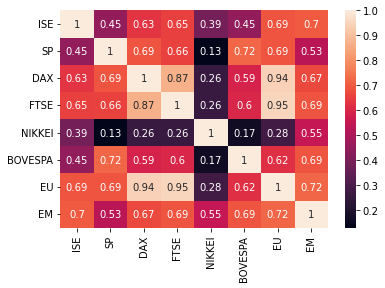

In [8]:
#finding the correlations rounded to two
ht=data.corr().round(2)
#displaying the heatmap 
sns.heatmap(ht, annot=True)

A linear relationship between the dependent and independent variables is not assumed by LR, nor are normally distributed error terms. Heatmap shows the output of the dependent variable (ISE) and the seven independent variables. The largest correlation coefficient between the dependent variable and the independent variables is 0.70. This 0.70 correlation coefficient is between ISE and EM. Any correlation coefficient above 0.75 is considered as a strong correlation. There is no correlation coefficient above 0.75 meaning that there is no dependent variable that shows a stronger linear relationship with dependent variable ISE. Therefore, the non-linearity assumption is not violated. 

# Normality Test

To determine if a collection of data might have originated from a theoretical distribution, one uses a Q-Q plot. Most of the time, this kind of plot is employed to assess the normality of a set of data. A Q-Q plot's points will fall along a straight diagonal line if the data are normally distributed.  

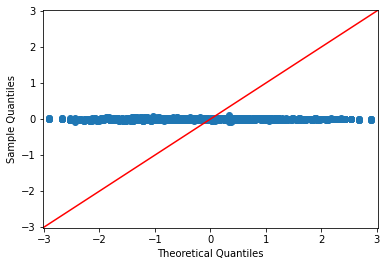

In [9]:
#importing the library statsmodel
import statsmodels.api as sm
#Q-Q plot for the normality test
fig = sm.qqplot(data, line='45')

The points of the Q-Q plot do not lie on the diagonal; hence the data is not normally distributed. 

# Multicollinearity Test 

Variance Inflation Factor (VIF) of the variables is used to check for multicollinearity. If VIF of the variable is greater than ten it means that there is multicollinearity. 

In [10]:
X = data.loc[:, list(data.columns)[1:8]]

In [11]:
#finding variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 

In [12]:
#locating the VIF scores in the X columns of our datasets
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
#displaying the VIF scores
display(vif_scores)

,Attribute,VIF Scores
0,SP,2.817907
1,DAX,8.758039
2,FTSE,10.557434
3,NIKKEI,1.637442
4,BOVESPA,3.142888
5,EU,21.996661
6,EM,3.985694


The VIF score of FTSE is 10.557434 > 10 and of EU is 21.996661 > 10. This shows that the two attributes/variables the EU and the FTSE are highly correlated, meaning they have a mutual relationship or connection. The attribute FTSE is London Stock Exchange and EU is MSCI Europe Index. FTSE is in London and London is in Europe. These attributes depend on each other. Hence when talking of EU indices, should include all indices in Europe. Thus, the connection between FSTE and EU is extremely high that is why there is multicollinearity between the two variables which is a problem. The two variables are drop in building the Logistic Regression.

In [13]:
#finding the median of the dependent variable ISE
data.loc[:,'ISE'].median()

0.0026426354999999997

In [14]:
#coverting the dependent ISE variable to binary form 
data.loc[data['ISE'] < 0.0026426354999999997, 'ISE'] = 0
data.loc[data['ISE'] >=0.0026426354999999997 , 'ISE'] = 1

In [15]:
data

,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,1.0,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,1.0,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,0.0,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,0.0,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,1.0,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802
...,...,...,...,...,...,...,...,...
531,1.0,0.006238,0.001925,0.007952,0.005717,0.018371,0.006975,0.003039
532,1.0,0.003071,-0.001186,0.000345,0.002620,0.001686,-0.000581,0.001039
533,0.0,0.001923,0.002872,-0.000723,0.000568,0.005628,0.000572,0.006938
534,0.0,-0.020742,-0.014239,-0.011275,0.001358,-0.011942,-0.012615,-0.000958


In [16]:
#checking for missing values in the dataset
print(data.isnull().values.any())

False


<AxesSubplot:xlabel='ISE', ylabel='count'>

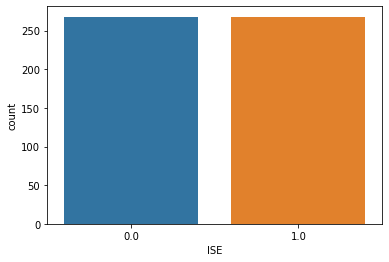

In [17]:
#checking how the dependent variable in binary form is balanced
sns.countplot(x ='ISE', data = data)

In [18]:
#finding the coefficients of the logistic regression
Xtrain = data[['SP', 'DAX', 'BOVESPA','EM','NIKKEI']]
ytrain = data[['ISE']]

In [19]:
#fitting the logistic regression
log_reg = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.468641
         Iterations 7


In [20]:
#displaying the summary table of the logistic regression
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                    ISE   No. Observations:                  536
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            4
Date:                Sun, 29 Oct 2023   Pseudo R-squ.:                  0.3239
Time:                        15:48:59   Log-Likelihood:                -251.19
converged:                       True   LL-Null:                       -371.53
Covariance Type:            nonrobust   LLR p-value:                 6.653e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SP             9.2616     14.507      0.638      0.523     -19.172      37.695
DAX           49.9303     13.477      3.705      0.000      23.515      76.345
BOVESPA      -38.0663     13.963     -2.726      0.0

# Coefficients of the Model and their Significance

A significant variable is a variable that has its p-value less than 0.05. The coefficient of the SP is not statistically significant because its p-value > 0.05. Pertaining to the coefficient DAX, it is statistically significant since its p-value < 0.05. BOVESPA is another coefficient in our model, and it is statistically significant since its p-value < 0.05.  EM again is another coefficient on the model that is statistically significant since its p-value < 0.05. Lastly, the NIKKEI is the other coefficient. This coefficient is not statistically. Its p-value > 0.05. 


# Model Adequacy

For the LR model's residuals to be meaningful, they must be converted. The dependent variable is binary. The residuals will not have a normal distribution because the outcome is binary, and it is unclear how they will be dispersed. Depending on the assessment, the residuals are either deviance residuals, studentized Pearson residuals, or Pearson residuals.  A Lowess smoothed plot of the studentized Pearson residuals, or the deviance residuals, against the predicted probability or linear predictor values is used to diagnose a LR model. 
Measurement mistakes, ambiguous initial and boundary conditions, and other uncertainties can all affect mathematical models of physical systems. When these uncertainties are considered, it is frequently found that there are still differences between the model output and the observations; in this case, the model is said to be inadequate.
A Lowess smoothed plot of the studentized Pearson residuals, or the deviance residuals, against the predicted probability or linear predictor values is used to diagnose a logistic regression model. Nachtsheim et. al., 2004 demonstrate that if the logistic regression model is accurate, then the error (difference) between the actual value and the predicted value Y_i and predicted value П_i^ᶺ is equal to 0, i.e.,  Y_i-П_i^ᶺ=0                                                                    
Graphs below are the Logistic Regression Residual Plots Using Seaborn Lowess Line (N=400) to show whether the LR model is adequate or not. 


C:\Users\MuvirimiT\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MuvirimiT\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


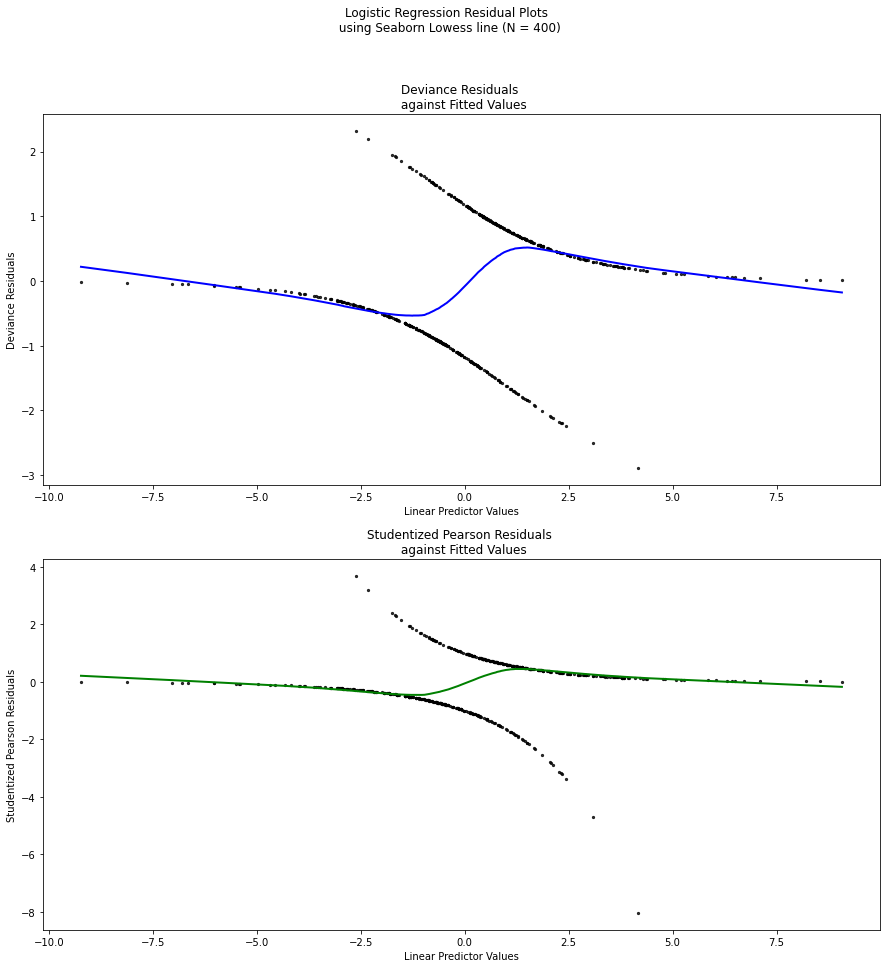

In [21]:
#the residual plots, deviance residual and the stundentized pearson residual 
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")
sns.regplot(log_reg.fittedvalues, log_reg.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")
sns.regplot(log_reg.fittedvalues, log_reg.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()

The graphs above is for the Standardized Pearson Residuals and do approximate horizontal line with 0 intercept. This suggests that there is no significant model inadequacy.

In [22]:
#selecting the dependent variable ISE
y=data['ISE']

In [23]:
#displaying the first five rows of the ISE
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: ISE, dtype: float64

# Selection of the variables DAX, BOVESPA and EM which are statistically significant to be fed into the artificial deep neural network (ADNN).

In [24]:
#taking only the statistically significant variables
X = data.loc[:, ['DAX', 'BOVESPA', 'EM']]

In [25]:
#displaying on the variables of the five rows of the statistically significant 
X.head()

,DAX,BOVESPA,EM
0,0.002193,0.031190,0.028524
1,0.008455,0.018920,0.008773
2,-0.017833,-0.035899,-0.020015
3,-0.011726,0.028283,-0.019424
4,-0.019873,-0.009764,-0.007802


In [26]:
#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X=data.loc[:,['DAX', 'BOVESPA', 'EM']]
y=data['ISE']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
#shape of data
X_train.shape, X_test.shape

((482, 3), (54, 3))

# Scaling the dataset

In [28]:
#scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [29]:
#displaying the x_scaled
X_train_scaled[:3]

array([[ 1.1447362 ,  2.60444175,  2.10292797],
       [-0.06628848, -0.06290624,  0.45927318],
       [-0.34326433, -1.12711174,  0.27019931]])

# Creation of the model

In [30]:
#model creation
import tensorflow as tf
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Model Compilation

In [31]:
#model compilation
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Fitting the Model

In [32]:
#model fitting
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.7199 - precision: 0.6895 - recall: 0.7958
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4799 - accuracy: 0.7739 - precision: 0.7860 - recall: 0.7500
Epoch 3/100
5/5 [==============================] - 0s 857us/step - loss: 0.4823 - accuracy: 0.7801 - precision: 0.7659 - recall: 0.8042
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4639 - accuracy: 0.7863 - precision: 0.7645 - recall: 0.8250
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7967 - precision: 0.7840 - recall: 0.8167
Epoch 6/100
5/5 [==============================] - 0s 902us/step - loss: 0.4525 - accuracy: 0.8050 - precision: 0.7852 - recall: 0.8375
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7988 - precision: 0.7698 - recall: 0.8500
Epoch 8/100
5/5 [==============================] - 0s 1ms/

# Visualiasation of the matrices 

In [33]:
#import the visualisation libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize']=(18,8)
rcParams['axes.spines.top']=False
rcParams['axes.spines.right']=False

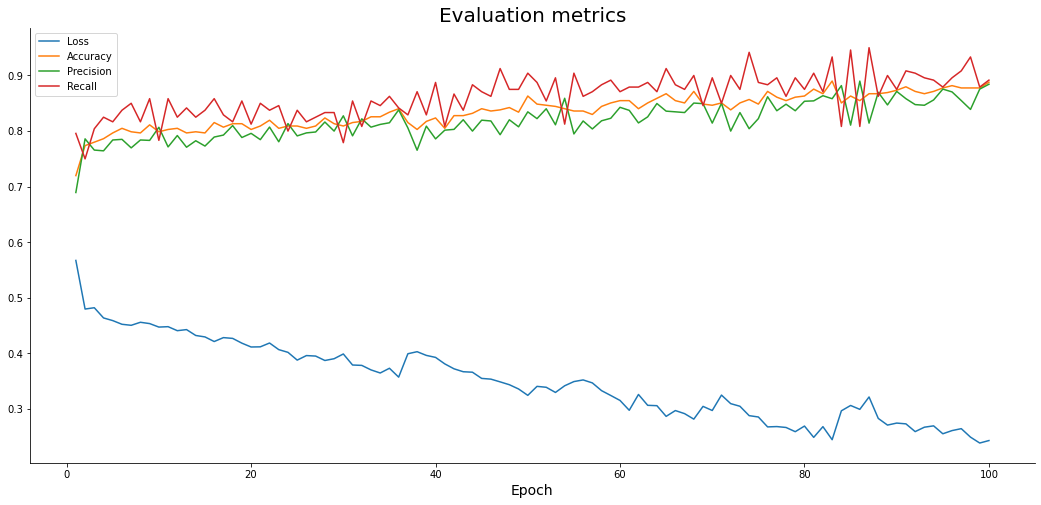

In [34]:
#visualising the evaluation metrics
plt.plot(np.arange(1,101), history.history['loss'], label='Loss')
plt.plot(np.arange(1,101), history.history['accuracy'], label='Accuracy')
plt.plot(np.arange(1,101), history.history['precision'], label='Precision')
plt.plot(np.arange(1,101), history.history['recall'], label='Recall')
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

From the diagram above we can see that our loss is very low. The accuracy, recall and precision are very high. We can see that in our artificial deep neural network (ADNN) model, where loss is decreasing as the other parameters are growing, which is normal pattern. There are some occasional spikes that would smoothen out if we are to train the ADNN model for more epochs. 

# Predictions

In [35]:
#predictions
predictions=model.predict(X_test_scaled)

In [36]:
#displaying predictions
predictions

array([[4.6469867e-03],
       [7.2279203e-05],
       [5.5827183e-01],
       [2.9769301e-01],
       [9.8949027e-01],
       [2.0236347e-22],
       [5.3567574e-06],
       [6.3525593e-01],
       [4.2641965e-01],
       [9.9999738e-01],
       [2.8647717e-05],
       [8.5408807e-01],
       [3.7356961e-01],
       [9.2908692e-01],
       [1.1397043e-01],
       [2.0035720e-01],
       [1.7699352e-01],
       [7.6470478e-06],
       [9.9999917e-01],
       [1.8624380e-01],
       [4.8875371e-01],
       [1.6718596e-01],
       [9.6232891e-03],
       [9.9797475e-01],
       [3.8234503e-13],
       [1.4912337e-02],
       [3.2145244e-01],
       [9.7540557e-01],
       [4.0727836e-01],
       [9.2019594e-01],
       [3.9785480e-01],
       [9.1836733e-01],
       [9.9992466e-01],
       [8.8617098e-01],
       [7.5258785e-01],
       [8.1762153e-01],
       [9.9882948e-01],
       [1.0000000e+00],
       [5.2805364e-02],
       [6.8663889e-01],
       [5.3492397e-01],
       [9.908645

In [37]:
#predictions classes
prediction_classes=[1 if prob>=0.0026426354999999997 else 0 for prob in np.ravel(predictions)]

In [38]:
#predictions of first twenty classes
prediction_classes[:20]

[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1]

In [39]:
#importing the confusion_matrix library
from sklearn.metrics import confusion_matrix

In [40]:
#displaying the matrix
print(confusion_matrix(y_test, prediction_classes))

[[ 9 17]
 [ 1 27]]


In [41]:
#import the accuracy libarary
from sklearn.metrics import accuracy_score

In [42]:
#displying the accuracy
print(accuracy_score(y_test, prediction_classes))

0.6666666666666666


In [43]:
#importing the library classification_report
from sklearn.metrics import classification_report

In [44]:
#displaying the classification_report
print(classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

         0.0       0.90      0.35      0.50        26
         1.0       0.61      0.96      0.75        28

    accuracy                           0.67        54
   macro avg       0.76      0.66      0.62        54
weighted avg       0.75      0.67      0.63        54



In [45]:
#importing the libraries of the roc_curve and auc
from sklearn.metrics import roc_curve, auc

In [46]:
pip install num_of_epochs

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement num_of_epochs (from versions: none)
ERROR: No matching distribution found for num_of_epochs

[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
#fitting the model
history = model.fit(X_train, y_train, validation_data=(
        X_test, y_test), epochs=100, batch_size=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 1s 118ms/step - loss: 1.2264 - accuracy: 0.4979 - precision: 0.4966 - recall: 0.6167 - val_loss: 0.7278 - val_accuracy: 0.4815 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.5270 - precision: 0.9286 - recall: 0.0542 - val_loss: 0.6333 - val_accuracy: 0.6111 - val_precision: 0.5714 - val_recall: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6666 - accuracy: 0.5830 - precision: 0.5582 - recall: 0.7792 - val_loss: 0.6500 - val_accuracy: 0.5741 - val_precision: 1.0000 - val_recall: 0.1786
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.6240 - accuracy: 0.6556 - precision: 0.6186 - recall: 0.8042 - val_loss: 0.6118 - val_accuracy: 0.6296 - val_precision: 1.0000 - val_recall: 0.2857
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6002 - accuracy: 0.6598 - precisi

In [48]:
#predictions
y_pred = model.predict(X_test).ravel()

# Area Under a Curve

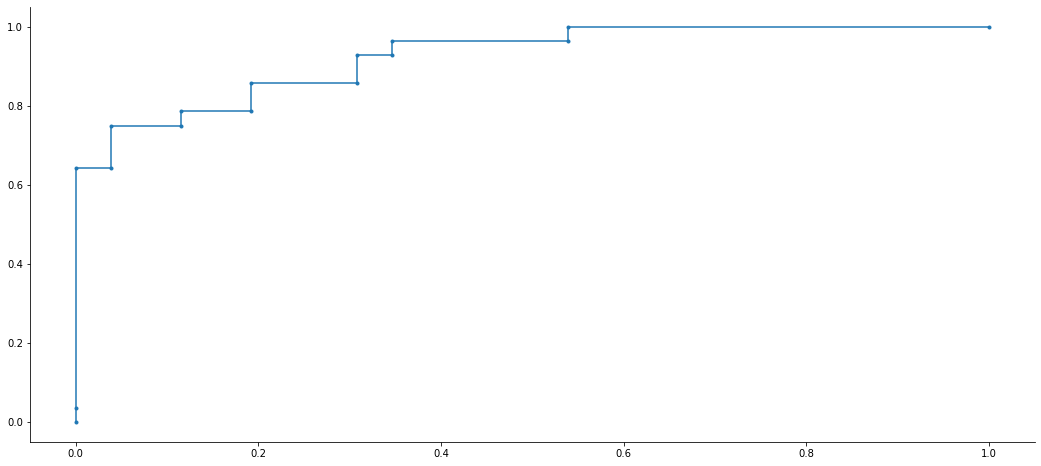

In [49]:
#displaying the roc_curve
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [50]:
#importing the auc library
from sklearn.metrics import auc

In [51]:
#displaying the area under the curve
auc(nn_fpr_keras, nn_tpr_keras)

0.9244505494505494

# Summary and Conclusion 

This writeup concludes with a successful prediction of the dataset namely Instabul Stock Exchange and via the Logistic Regression (LR) and artificial deep nueral network (ADNN) by using the Python programming language.  EU and the FSTE were omitted due to multicollinearity. For the LR prediction model, DAX, BOVESPA, and EM are statistically significant. The NIKKEI and SP variables were removed before modelling ADNN model since they were not found to be statistically significant in LR. 